<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


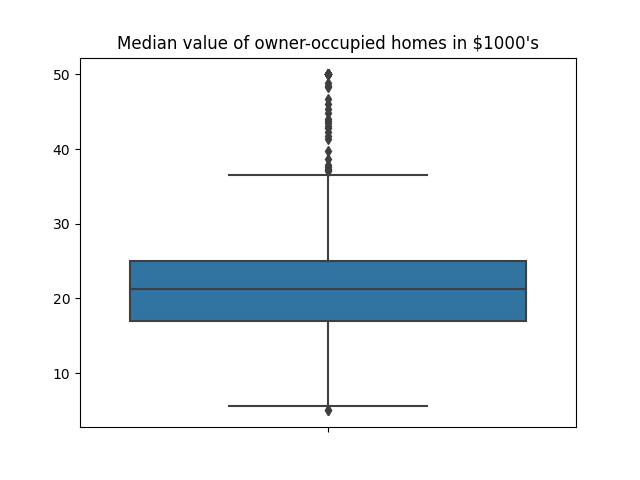

In [28]:
ax = sns.boxplot(y='MEDV', data=boston_df).set(title="Median value of owner-occupied homes in $1000's")
pyplot.ylabel('')
pyplot.show()

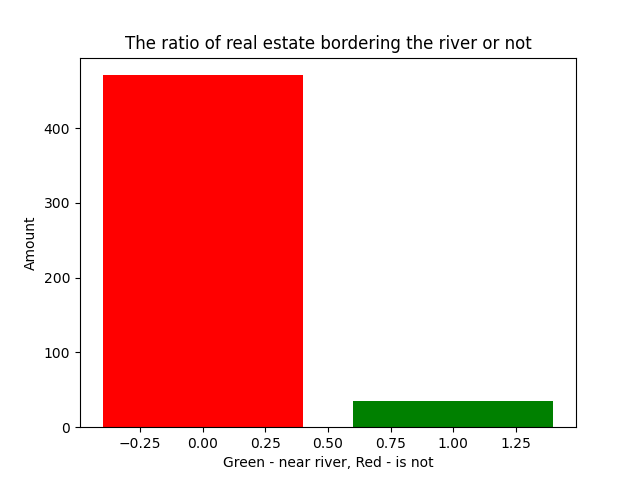

In [23]:
pyplot.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['red','green'])
pyplot.title('The ratio of real estate bordering the river or not')
pyplot.xlabel('Green - near river, Red - is not')
pyplot.ylabel('Amount')
pyplot.show()

<ipython-input-53-b43e6da89bce>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  boston_df_age_70 = boston_df[boston_df.AGE >= 35][boston_df.AGE < 70]
<ipython-input-53-b43e6da89bce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df_age_35.loc[:, 'age_group'] = '<35'
<ipython-input-53-b43e6da89bce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df_age_70.loc[:, 'age_group'] = '35-70'
<ipython-input-53-b43e6da89bce>:6: SettingWithCopyWarning: 
A value is tryi

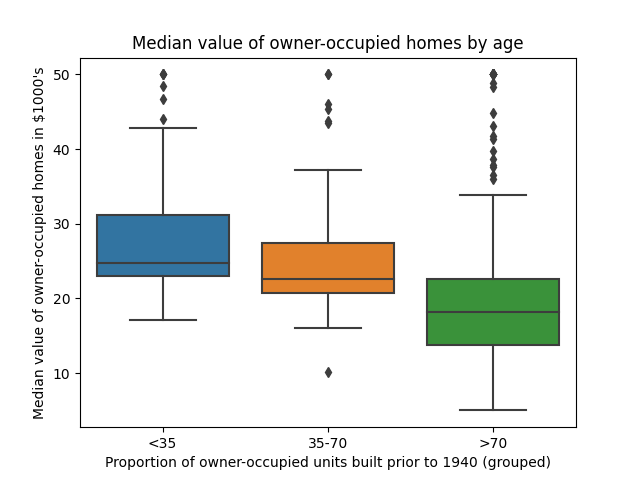

In [53]:
boston_df_age_35 = boston_df[boston_df.AGE < 35]
boston_df_age_70 = boston_df[boston_df.AGE >= 35][boston_df.AGE < 70]
boston_df_age_old = boston_df[boston_df.AGE >= 70]
boston_df_age_35.loc[:, 'age_group'] = '<35'
boston_df_age_70.loc[:, 'age_group'] = '35-70'
boston_df_age_old.loc[:, 'age_group'] = '>70'
boston_df_age = pd.concat([boston_df_age_35, boston_df_age_70, boston_df_age_old])
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df_age).set(title='Median value of owner-occupied homes by age')
pyplot.xlabel('Proportion of owner-occupied units built prior to 1940 (grouped)')
pyplot.ylabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

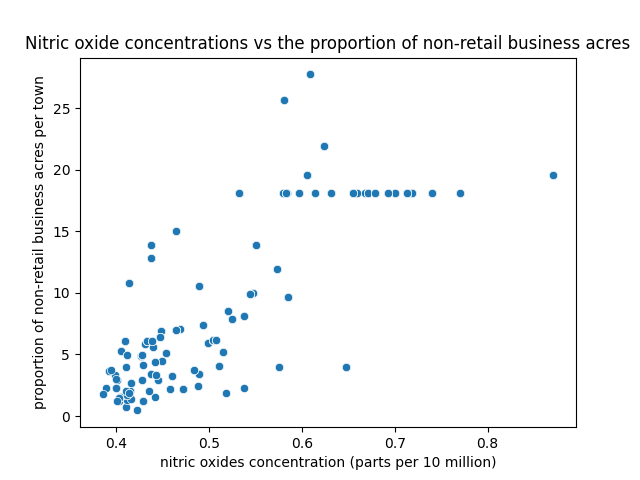

In [56]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.xlabel('nitric oxides concentration (parts per 10 million)')
pyplot.ylabel("proportion of non-retail business acres per town")
pyplot.title('Nitric oxide concentrations vs the proportion of non-retail business acres')
pyplot.show()

It seems to be a direct relationship between concentration of nitric oxides and number of non-retail businesses.

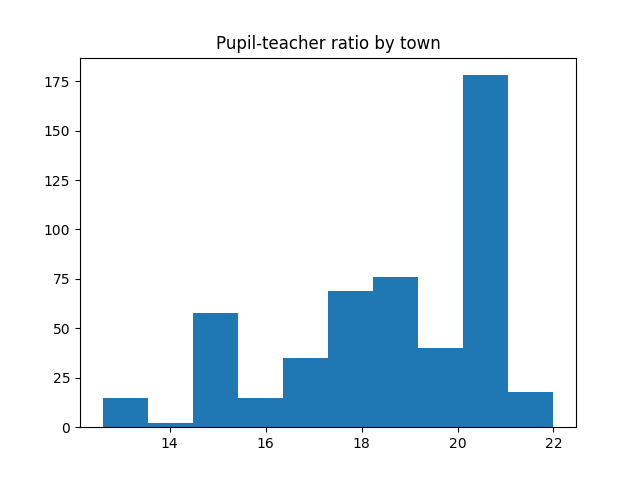

In [60]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Pupil-teacher ratio by town')
pyplot.show()

<h3>Hypothesis: there are no significant difference in median value of houses bounded by the Charles river or not.</h3>

In [59]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'],equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

<b>Hypothesis accepted!</b>

<h3>Hypothesis: there are no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)</h3>

In [62]:
f_stats,p_value=scipy.stats.f_oneway(boston_df_age_35['MEDV'],boston_df_age_70['MEDV'],boston_df_age_old['MEDV'])
print('F = ', f_stats, '; p = ', p_value)

F =  36.40764999196599 ; p =  1.7105011022702984e-15


<b>Hypothesis accepted!</b>

<h3>Hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.</h3>

In [63]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

<b>Hypothesis rejected!</b>

<h3>Hypothesis: additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.</h3>

In [70]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        22:33:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Hypothesis rejected!</b>